In [1]:
#!pip install wordcloud

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import log_loss


#NLP tools
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
stopwords = nltk.corpus.stopwords.words('english')


#Plot and image tools
from PIL import Image
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
sns.set_style("dark")

In [2]:
train = pd.read_csv("C:\\Users\\wawxl\\Desktop\\Jproject\\train.csv")
test = pd.read_csv("C:\\Users\\wawxl\\Desktop\\Jproject\\test.csv")

In [3]:
train.head(50)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.000000,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.000000,4,47
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.009524,0,105
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.220339,0,59
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.000000,0,4
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,26662,approved,0,0,0,0,0,0.000000,0,4
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,26650,approved,0,0,0,1,0,0.000000,0,4


In [4]:
test.head(5)

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [6]:
text = " ".join(review for review in train.comment_text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 538275381 words in the combination of all review.


## Descriptive Statistics

In [7]:
train1=train[['id','target','comment_text']]

In [8]:
train1.head()

,id,target,comment_text
0,59848,0.000000,"This is so cool. It's like, 'would you want yo..."
1,59849,0.000000,Thank you!! This would make my life a lot less...
2,59852,0.000000,This is such an urgent design problem; kudos t...
3,59855,0.000000,Is this something I'll be able to install on m...
4,59856,0.893617,haha you guys are a bunch of losers.


In [9]:
train1['Toxic']=[1 if b>=0.5 else 0 for b in train1.target]

<ipython-input-9-2809bee6ec1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train1['Toxic']=[1 if b>=0.5 else 0 for b in train1.target]


In [10]:
train1

,id,target,comment_text,Toxic
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0
1,59849,0.000000,Thank you!! This would make my life a lot less...,0
2,59852,0.000000,This is such an urgent design problem; kudos t...,0
3,59855,0.000000,Is this something I'll be able to install on m...,0
4,59856,0.893617,haha you guys are a bunch of losers.,1
...,...,...,...,...
1804869,6333967,0.000000,"Maybe the tax on ""things"" would be collected w...",0
1804870,6333969,0.000000,What do you call people who STILL think the di...,0
1804871,6333982,0.000000,"thank you ,,,right or wrong,,, i am following ...",0
1804872,6334009,0.621212,Anyone who is quoted as having the following e...,1


In [11]:
#see distribution of toxic and non toxic
non_toxic = len(train1[train1['Toxic'] == 0])
toxic = len(train1[train1['Toxic'] == 1])
print(f'There are {non_toxic} non-toxic comments, representing a {round((non_toxic/len(train1)*100))}% of the total {len(train1)} samples collected.')
print(f'Only {toxic} - about a {round((toxic/len(train1))*100)}% - are toxic comments.')

There are 1660540 non-toxic comments, representing a 92% of the total 1804874 samples collected.
Only 144334 - about a 8% - are toxic comments.


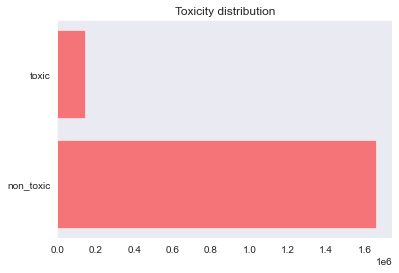

In [12]:
plt.barh(['non_toxic', 'toxic'], [non_toxic, toxic], color = 'r', alpha = 0.5)
plt.title('Toxicity distribution')
plt.show()

#### Based on the bar chart above, the dataset is really imbalanced. We need to resample the dataset for modeling

In [13]:
train_sample = train1.sample(frac = 0.2, random_state = 42, axis = 'index')
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360975 entries, 286892 to 437260
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            360975 non-null  int64  
 1   target        360975 non-null  float64
 2   comment_text  360975 non-null  object 
 3   Toxic         360975 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 13.8+ MB


In [14]:
#see distribution of toxic and non toxic again for resampled dataset
non_toxic = len(train_sample[train_sample['Toxic'] == 0])
toxic = len(train_sample[train_sample['Toxic'] == 1])
print(f'There are {non_toxic} non-toxic comments, representing a {round((non_toxic/len(train_sample)*100))}% of the total {len(train_sample)} samples collected.')
print(f'Only {toxic} - about a {round((toxic/len(train_sample))*100)}% - are toxic comments.')

There are 331897 non-toxic comments, representing a 92% of the total 360975 samples collected.
Only 29078 - about a 8% - are toxic comments.


In [15]:
>>> import nltk
>>> nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\wawxl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
#data preprosessing 
from bs4 import BeautifulSoup # Text Cleaning
import re, string # Regular Expressions, String
from nltk.corpus import stopwords # stopwords
from nltk.stem.porter import PorterStemmer # for word stemming
from nltk.stem import WordNetLemmatizer # for word lemmatization
import unicodedata
import html

# set of stopwords to be removed from text
stop = set(stopwords.words('english'))

# update stopwords to have punctuation too
stop.update(list(string.punctuation))

def clean_text(text):
    
    # Remove unwanted html characters
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
    'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
    '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
    ' @-@ ', '-').replace('\\', ' \\ ')
    text = re1.sub(' ', html.unescape(x1))
    
    # remove non-ascii characters
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    
#     # strip html
#     soup = BeautifulSoup(text, 'html.parser')
#     text = soup.get_text()
    
    # remove between square brackets
    text = re.sub('\[[^]]*\]', '', text)
    
    # remove URLs
    text = re.sub(r'http\S+', '', text)
    
    # remove twitter tags
    text = text.replace("@", "")
    
    # remove hashtags
    text = text.replace("#", "")
    
    # remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z ]', '', text)
    
    # remove stopwords from text
    final_text = []
    for word in text.split():
        if word.strip().lower() not in stop:
            final_text.append(word.strip().lower())
    
    text = " ".join(final_text)
    
    # lemmatize words
    lemmatizer = WordNetLemmatizer()    
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    text = " ".join([lemmatizer.lemmatize(word, pos = 'v') for word in text.split()])
    
    # replace all numbers with "num"
    text = re.sub("\d", "num", text)
    
    return text.lower()

In [17]:
train_sample['clean_comment_text'] = train_sample['comment_text'].apply(clean_text)
test['clean_comment_text'] = test['comment_text'].apply(clean_text)

In [18]:
train_sample.head(5)

,id,target,comment_text,Toxic,clean_comment_text
286892,593336,0.166667,What a breathe of fresh air to have someone wh...,0,breathe fresh air someone embrace common sense...
419218,756192,0.600000,Your jewish friends were the ones who told you...,1,jewish friend one tell zionist control canadav...
1055330,5407051,0.000000,Possible collusion by Trump and his affiliates...,0,possible collusion trump affiliate debunk stat...
1382764,5808132,0.000000,Exactly. We need a % of GDP spending cap at t...,0,exactly need gdp spend cap federal level would...
256049,557013,0.000000,"By your own comment, even if some of them vote...",0,comment even vote ndp pq trudeau demonstrably ...


In [19]:
from sklearn import preprocessing
#split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = train_test_split(train_sample['clean_comment_text'],train_sample['Toxic'])
#label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [20]:
valid_y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix,precision_score,precision_recall_curve,recall_score,f1_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score

In [22]:
# value the term importance using tf-idf, set max df=0.99 (ignore terms appear over 0.99 of all documents, and min_df=0.01 ignore terms appear less than 0.01 of all documents)
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000,max_df=0.99,min_df=0.01)
tfidf_vect.fit(train_sample['clean_comment_text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [23]:
#Return the classification report
from sklearn.metrics import classification_report
def train_model(classifier, feature_vector_train, label, feature_vector_valid):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    return classification_report(valid_y,predictions)

In [24]:
from sklearn import svm
accuracyORIGINAL = train_model(linear_model.LogisticRegression(solver='lbfgs',multi_class='ovr'),xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR Baseline, WordLevel TFIDF: ")
print(accuracyORIGINAL)
accuracyORIGINAL = train_model(svm.LinearSVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM Baseline, WordLevel TFIDF: ")
print(accuracyORIGINAL)


#### original model"
####logistic regression has 0.01 recall for 1 meaning that the percentage of actual 1 taht were correctly classified is only 1%
####SVM has recall 0.00 even worse for predicting 1

LR Baseline, WordLevel TFIDF: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     82969
           1       0.54      0.01      0.02      7275

    accuracy                           0.92     90244
   macro avg       0.73      0.50      0.49     90244
weighted avg       0.89      0.92      0.88     90244

SVM Baseline, WordLevel TFIDF: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     82969
           1       0.65      0.00      0.00      7275

    accuracy                           0.92     90244
   macro avg       0.78      0.50      0.48     90244
weighted avg       0.90      0.92      0.88     90244



In [25]:
#Random Over Sampling: over-sample the minority group by picking samples at random with replacement
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
ros_xtrain_tfidf, ros_train_y = ros.fit_resample(xtrain_tfidf, train_y)
accuracyROS = train_model(linear_model.LogisticRegression(solver='lbfgs',multi_class='ovr'),ros_xtrain_tfidf, ros_train_y, xvalid_tfidf)
print ('LR ROS, WordLevel TFIDF: ')
print(accuracyROS)
accuracyROS = train_model(svm.LinearSVC(),ros_xtrain_tfidf, ros_train_y, xvalid_tfidf)
print ("SVM ROS, WordLevel TFIDF: ")
print(accuracyROS)


#### random over sampling 
####logistic regression has 0.61 recall for 1 meaning that the percentage of actual 1 that were correctly classified is 61%
####SVM also has 0.61 recall for 1

LR ROS, WordLevel TFIDF: 
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     82969
           1       0.14      0.61      0.23      7275

    accuracy                           0.67     90244
   macro avg       0.55      0.64      0.51     90244
weighted avg       0.89      0.67      0.74     90244

SVM ROS, WordLevel TFIDF: 
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     82969
           1       0.14      0.61      0.23      7275

    accuracy                           0.67     90244
   macro avg       0.55      0.64      0.51     90244
weighted avg       0.89      0.67      0.74     90244



In [26]:
#SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
sm_xtrain_tfidf, sm_train_y = sm.fit_resample(xtrain_tfidf, train_y)
print('Resampled dataset shape %s' % Counter(sm_train_y))
accuracySMOTE = train_model(linear_model.LogisticRegression(solver='lbfgs',multi_class='ovr'),sm_xtrain_tfidf, sm_train_y, xvalid_tfidf)
print ("LR SMOTE, WordLevel TFIDF: ")
print(accuracySMOTE)
accuracySMOTE = train_model(svm.LinearSVC(),sm_xtrain_tfidf, sm_train_y, xvalid_tfidf)
print ("SVC SMOTE, WordLevel TFIDF: ")
print(accuracySMOTE)

Resampled dataset shape Counter({0: 248928, 1: 248928})
LR SMOTE, WordLevel TFIDF: 
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     82969
           1       0.13      0.50      0.20      7275

    accuracy                           0.68     90244
   macro avg       0.53      0.60      0.50     90244
weighted avg       0.88      0.68      0.75     90244

SVC SMOTE, WordLevel TFIDF: 
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     82969
           1       0.12      0.51      0.20      7275

    accuracy                           0.67     90244
   macro avg       0.53      0.60      0.50     90244
weighted avg       0.87      0.67      0.74     90244



In [27]:
from imblearn.under_sampling import RandomUnderSampler
# Random Under Sampling
rus = RandomUnderSampler(random_state=0, replacement=True)
rus_xtrain_tfidf, rus_train_y = rus.fit_resample(xtrain_tfidf, train_y)
accuracyrus = train_model(linear_model.LogisticRegression(solver='lbfgs',multi_class='ovr'),rus_xtrain_tfidf, rus_train_y, xvalid_tfidf)
print ("LR RUS, WordLevel TFIDF: ")
print(accuracyrus)
accuracyrus = train_model(svm.LinearSVC(),rus_xtrain_tfidf, rus_train_y, xvalid_tfidf)
print ("SVC RUS, WordLevel TFIDF: ")
print(accuracyrus)

LR RUS, WordLevel TFIDF: 
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     82969
           1       0.14      0.62      0.23      7275

    accuracy                           0.66     90244
   macro avg       0.55      0.64      0.50     90244
weighted avg       0.89      0.66      0.74     90244

SVC RUS, WordLevel TFIDF: 
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     82969
           1       0.14      0.62      0.23      7275

    accuracy                           0.66     90244
   macro avg       0.54      0.64      0.50     90244
weighted avg       0.89      0.66      0.74     90244

